In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [4]:
def deriv(f, x0, h):
    '''Numerically approximates the derivative of a function evaluated at x0 using 2 methods
    
    Parameters:
    f: funtion to find derivative of
    x0 <float>: point at which we evaluate the derivative
    h <float>: step size
    
    Outputs:
    d1 <float>: derivative of f evaluated at x0 using method 1 
    d2 <float>: derivative of f evaluated at x0 using method 2'''
    
    #method 1
    d1 = (f(x0 + h) - f(x0)) / h
    
    #method 2
    d2 = (f(x0 + h) - f(x0-h)) / (2*h)
    
    return d1, d2

In [5]:
def f(x):
    '''function we want to find the derivative of'''
    return np.sin(x)

In [6]:
def actual_deriv(x0):
    '''calculates the actual derivative of sin(x) at a given point x0'''
    return np.cos(x0)

In [7]:
# creating range of small values for h
hs = np.arange(0, 1, 0.001)

# finding numerical derivatives of f at x0 = 0.1 using deriv function
x0 = 0.1
method1 = []
method2 = []
for h in hs:
    d1, d2 = deriv(f, x0, h)
    method1.append(d1)
    method2.append(d2)
    
# finding analytical derivative    
d_analytic = np.ones_like(method1)*actual_deriv(x0)

# finding the error compared to analytical derivative for both methods
error1 = (d_analytic - np.array(method1))/d_analytic
error2 = (d_analytic - np.array(method2))/d_analytic

/opt/python/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/opt/python/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


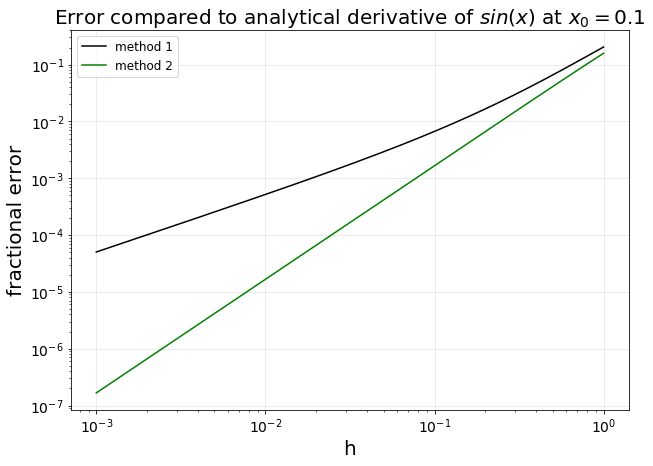

In [8]:
plt.figure(figsize=(10,7))
plt.plot(hs, error1, label='method 1', color='black')
plt.plot(hs, error2, label='method 2', color='green')
plt.title(r'Error compared to analytical derivative of $sin(x)$ at $x_0 = 0.1$', fontsize=20)
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h', fontsize=20)
plt.ylabel('fractional error', fontsize=20)
plt.savefig('derivatives.pdf')
plt.show()

# Question 2

In [9]:
def get_z(c):
    '''Does the iteration and finds the size of the vectors z in the x-y plane
    
    Parameters:
    c - complex number x + iy
    
    Returns:
    distances - list of distances for each zi, None if sequence diverges
    i - iterations until it diverges, 600 if it converges'''
    
    i = 0
    distances = []
    while i < STOP:
        if i == 0:
            z = c
            a, b = z.real, z.imag
            distances.append(np.sqrt(a**2 + b**2))
            i += 1
        else:
            z = z*z + c                                    # finding the new z
            a, b = z.real, z.imag
            try:                                           # if the set is bounded
                distances.append(np.sqrt(a**2 + b**2))
                i += 1
            except OverflowError:                          # if the set diverges
                return None, i        
    return distances, 10000

In [11]:
# defining maximum number of iterations
STOP = 10000

# creating values of x and y to iterate through
xs = np.linspace(-2, 2, 1000)
ys = np.linspace(-2, 2, 1000)

# creating lists for bound and infinite points and array for tracking iterations before divergence
bound_x, bound_y = [], []
infinite_x, infinite_y = [], []
iterations = np.zeros((len(xs), len(ys)))

# iterating through possible complex numbers c and finding the sizes of those vectors using get_z function
for j,x in enumerate(xs):
    for k,y in enumerate(ys):
        c = complex(x, y)
        dists, i = get_z(c)
        if dists:
            bound_x.append(x)
            bound_y.append(y)
            iterations[j,k] = i
        else:
            infinite_x.append(x)
            infinite_y.append(y)
            iterations[j,k] = i

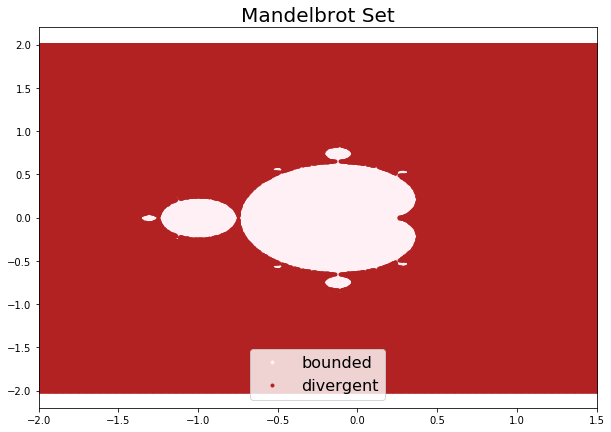

In [56]:
plt.figure(figsize=(10,7))
plt.plot(bound_x, bound_y, '.', color='lavenderblush', label='bounded')
plt.plot(infinite_x, infinite_y, '.', color='firebrick', label='divergent')
plt.legend(fontsize=16, loc='best')
plt.title('Mandelbrot Set', fontsize=20)
plt.xlim(-2, 1.5)
plt.savefig('duo.png')
plt.show()

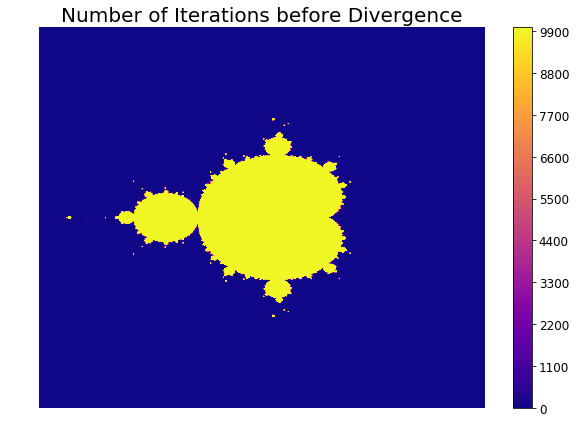

In [57]:
X, Y = np.meshgrid(xs, ys)

plt.figure(figsize=(10,7))
plt.contourf(Y, X, iterations, cmap='plasma', levels=100)
plt.title('Number of Iterations before Divergence', fontsize=20)
c = plt.colorbar()
c.ax.tick_params(labelsize=12)
plt.xlim(-2, 1.5)
plt.axis('off')
plt.savefig('iterations.png')
plt.show()

# Question 3

In [32]:
from scipy.integrate import odeint

In [42]:
def SIR_model(y, t, gamma, beta):
    S, I, R = y
    dydt = [-beta*S*I/N, beta*S*I/N - gamma*I, gamma*I]
    return dydt
    
y0 = [999, 1, 0]
t = np.linspace(0,200,1000)
N = 1000

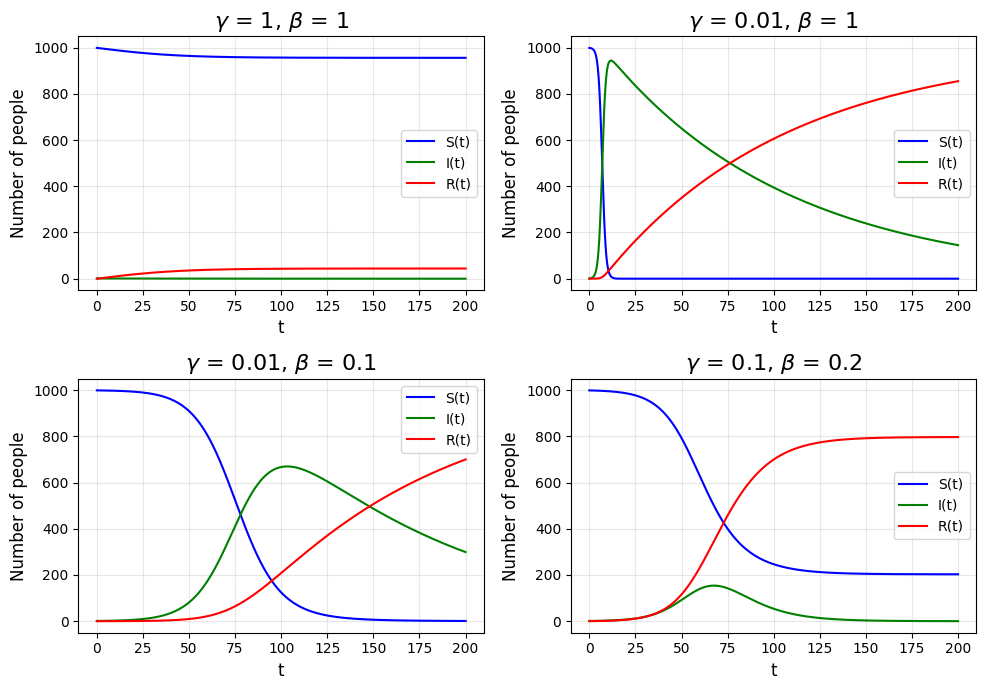

In [61]:
fig, ax = plt.subplots(2, 2, dpi=100, figsize=(10, 7))

# first
gamma = 1
beta = 1
sol = odeint(SIR_model, y0, t, args=(gamma, beta))

ax[0,0].plot(t, sol[:, 0], 'b', label='S(t)')
ax[0,0].plot(t, sol[:, 1], 'g', label='I(t)')
ax[0,0].plot(t, sol[:, 2], 'r', label='R(t)')
ax[0,0].legend(loc='best', fontsize=10)
ax[0,0].set_xlabel('t', fontsize=12)
ax[0,0].set_ylabel('Number of people', fontsize=12)
ax[0,0].set_title(r'$\gamma$ = {}, $\beta$ = {}'.format(gamma, beta), fontsize=16)
ax[0,0].grid(alpha=0.3)

# second
gamma = 0.01
beta = 1
sol = odeint(SIR_model, y0, t, args=(gamma, beta))

ax[0,1].plot(t, sol[:, 0], 'b', label='S(t)')
ax[0,1].plot(t, sol[:, 1], 'g', label='I(t)')
ax[0,1].plot(t, sol[:, 2], 'r', label='R(t)')
ax[0,1].legend(loc='best', fontsize=10)
ax[0,1].set_xlabel('t', fontsize=12)
ax[0,1].set_ylabel('Number of people', fontsize=12)
ax[0,1].set_title(r'$\gamma$ = {}, $\beta$ = {}'.format(gamma, beta), fontsize=16)
ax[0,1].grid(alpha=0.3)

# third
gamma = 0.01
beta = 0.1
sol = odeint(SIR_model, y0, t, args=(gamma, beta))

ax[1,0].plot(t, sol[:, 0], 'b', label='S(t)')
ax[1,0].plot(t, sol[:, 1], 'g', label='I(t)')
ax[1,0].plot(t, sol[:, 2], 'r', label='R(t)')
ax[1,0].legend(loc='best', fontsize=10)
ax[1,0].set_xlabel('t', fontsize=12)
ax[1,0].set_ylabel('Number of people', fontsize=12)
ax[1,0].set_title(r'$\gamma$ = {}, $\beta$ = {}'.format(gamma, beta), fontsize=16)
ax[1,0].grid(alpha=0.3)

# fourth
gamma = 0.1
beta = 0.2
sol = odeint(SIR_model, y0, t, args=(gamma, beta))

ax[1,1].plot(t, sol[:, 0], 'b', label='S(t)')
ax[1,1].plot(t, sol[:, 1], 'g', label='I(t)')
ax[1,1].plot(t, sol[:, 2], 'r', label='R(t)')
ax[1,1].legend(loc='best', fontsize=10)
ax[1,1].set_xlabel('t', fontsize=12)
ax[1,1].set_ylabel('Number of people', fontsize=12)
ax[1,1].set_title(r'$\gamma$ = {}, $\beta$ = {}'.format(gamma, beta), fontsize=16)
ax[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('SIR.pdf')
plt.show()